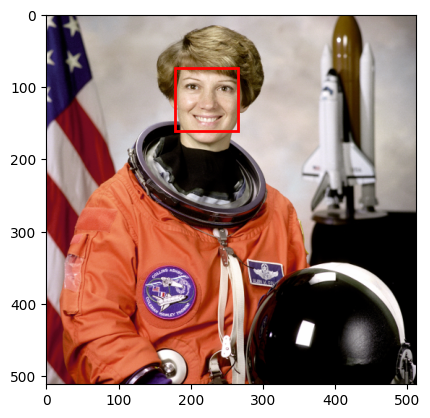

In [45]:
from skimage import data
from skimage.feature import Cascade
import matplotlib.pyplot as plt
from matplotlib import patches

trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
# what is a cascade?
# cascade is a series of filters that are applied to an image
# to detect a certain pattern
# in this case, the pattern is a face

detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill= False,
            color='r',
            linewidth=2
        )
    )

plt.show()

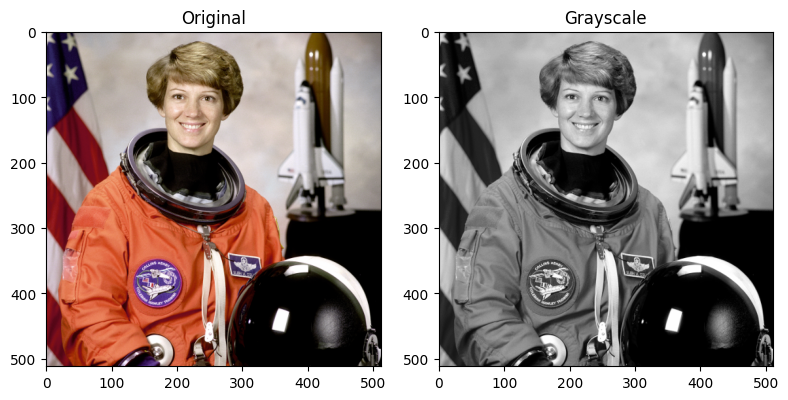

In [48]:
#RGB to grayscale
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
# what does ravel do?
# ravel flattens the array

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [15]:
"""Visual image comparison
Image comparison is particularly useful when performing image 
processing tasks such as exposure manipulations, filtering, and restoration.
This example shows how to easily compare two images with various approaches."""

'Visual image comparison\nImage comparison is particularly useful when performing image \nprocessing tasks such as exposure manipulations, filtering, and restoration.\nThis example shows how to easily compare two images with various approaches.'

In [16]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images


img1 = data.coins()
img1_equalized = exposure.equalize_hist(img1)
img2 = transform.rotate(img1, 2)


comp_equalized = compare_images(img1, img1_equalized, method='checkerboard')
diff_rotated = compare_images(img1, img2, method='diff')
blend_rotated = compare_images(img1, img2, method='blend')

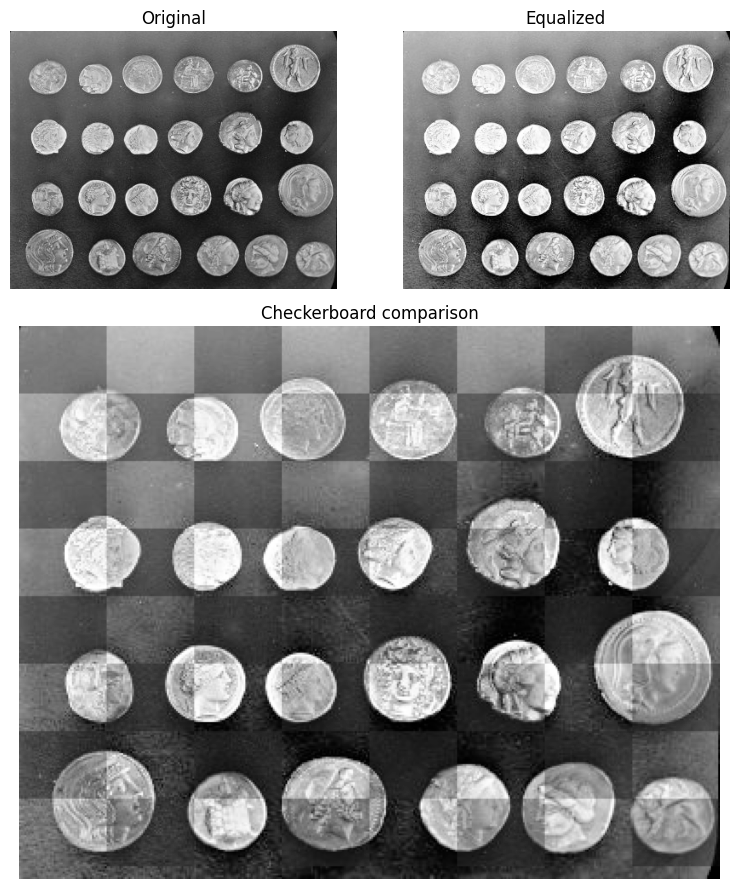

In [17]:
# The checkerboard method alternates tiles from the first and the second images.
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_equalized, cmap='gray')
ax1.set_title('Equalized')
ax2.imshow(comp_equalized, cmap='gray')
ax2.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

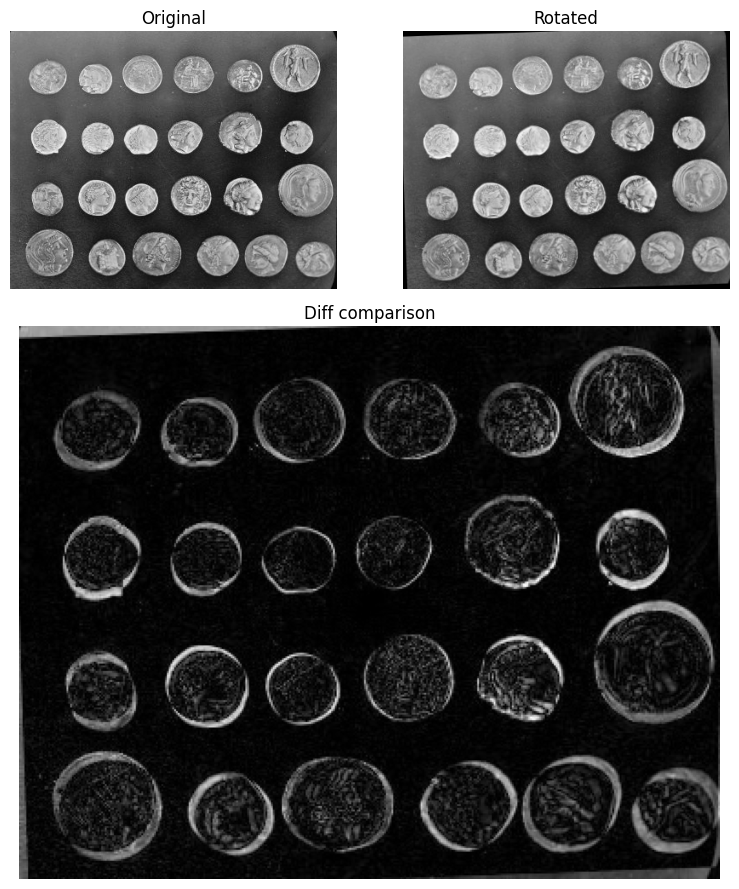

In [18]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

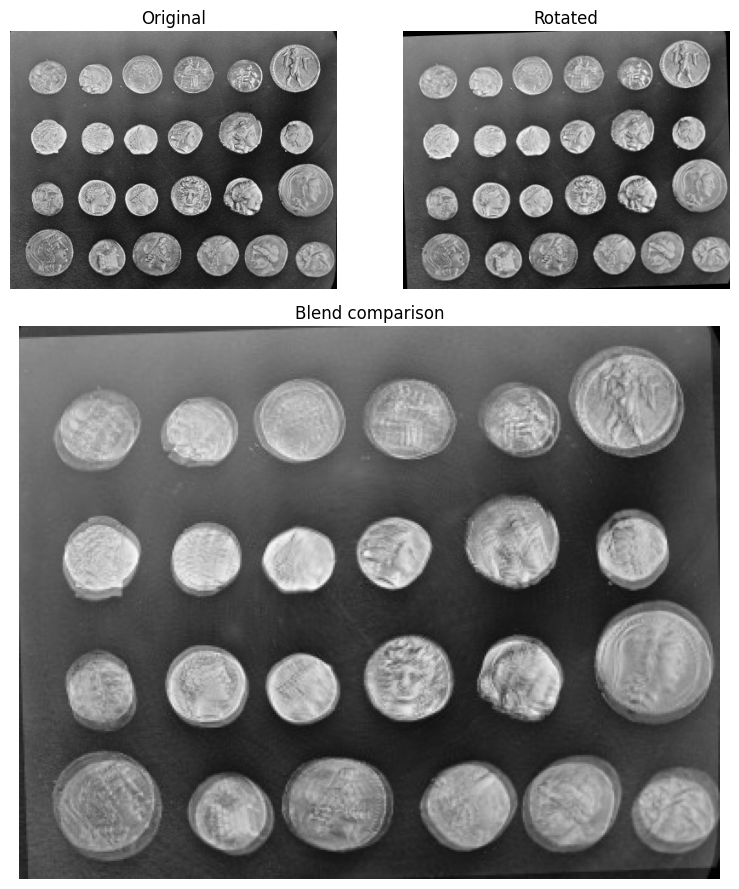

In [19]:
# blend is the result of the average of the two images.
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(blend_rotated, cmap='gray')
ax2.set_title('Blend comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

In [20]:
# Render text onto an image
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

img = data.cat()

fig = plt.figure()
fig.figimage(img, resize=True)

fig.text(0, 0.99, "I am stefan's cat.", fontsize=32, va="top")
fig.canvas.draw()
annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
plt.close(fig)

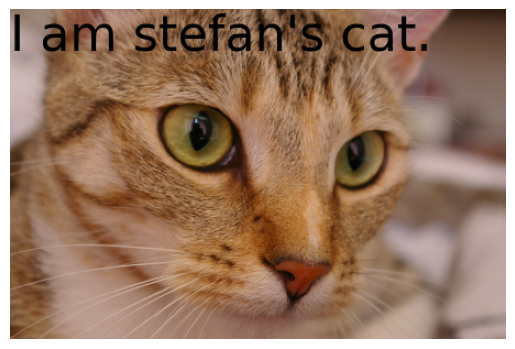

In [21]:
fig, ax = plt.subplots()
ax.imshow(annotated_img)
ax.set_axis_off()
# ax.set_position([1, 1, 1, 1])
plt.show()

In [22]:
# How to Extract Text from Images with Python?

from PIL import Image
from pytesseract import pytesseract

In [23]:

# Defining paths to tesseract.exe
# and the image we would be using

#For windows: download the exe file from
#https://github.com/UB-Mannheim/tesseract/wiki

#Windows users
#path_to_tesseract = "C:/Program Files/Tesseract-OCR/tesseract.exe"

#Mac users
path_to_tesseract = "/usr/bin/tesseract"
image_path = "Screenshot_134524.png"

# Opening the image & storing it in an image object
img = Image.open(image_path)

# Providing the tesseract executable
# location to pytesseract library
pytesseract.tesseract_cmd = path_to_tesseract

# Passing the image object to image_to_string() function
# This function will extract the text from the image
text = pytesseract.image_to_string(img)

# Displaying the extracted text
print(text)


Given India’s vulnerability on the Siliguri corridor and the largely ceremonial
military force of Bhutan, the Indian national security planners have decided
to secure North-East states with conventionally armed short-range ballistic
missiles like Pralay with a max range of 500 kilometres and conventionally
armed subsonic cruise missile Nirbhay with a max range of 1500 kilometres.
India also has other conventionally armed delivery platforms.

The development trials of both Pralay and Nirbhay have been completed to
the satisfaction of missile developer DRDO and user trials are expected
soon with the Defence Ministry already placing orders on the Pralay missile.



In [24]:
textclean = text.replace('\n','')
print(textclean)

Given India’s vulnerability on the Siliguri corridor and the largely ceremonialmilitary force of Bhutan, the Indian national security planners have decidedto secure North-East states with conventionally armed short-range ballisticmissiles like Pralay with a max range of 500 kilometres and conventionallyarmed subsonic cruise missile Nirbhay with a max range of 1500 kilometres.India also has other conventionally armed delivery platforms.The development trials of both Pralay and Nirbhay have been completed tothe satisfaction of missile developer DRDO and user trials are expectedsoon with the Defence Ministry already placing orders on the Pralay missile.


In [25]:
#get the ranges of the missiles
import re
list_ranges = re.findall("\d+\s\w+",textclean)
print(list_ranges)

['500 kilometres', '1500 kilometres']


In [26]:
#names of the missile?
list_pr = re.findall('\w+\s(?=missile)', textclean)
print(list_pr[-1])

Pralay 


In [27]:
re.findall('\w+\sand\s\w+', textclean)


['corridor and the',
 'kilometres and conventionallyarmed',
 'Pralay and Nirbhay',
 'DRDO and user']

In [28]:
list_n = re.findall('(?<=missile)\s\w+', textclean)
print(list_n[0])

 Nirbhay


In [29]:
list_missile_names = [list_pr[-1], list_n[0]]
print(list_missile_names)


['Pralay ', ' Nirbhay']


In [30]:
dict_missile_ranges = dict(zip(list_missile_names,list_ranges))
print(dict_missile_ranges)
import pandas as pd
df_missile_ranges = pd.DataFrame(dict_missile_ranges.items())
print(df_missile_ranges)

{'Pralay ': '500 kilometres', ' Nirbhay': '1500 kilometres'}
          0                1
0   Pralay    500 kilometres
1   Nirbhay  1500 kilometres


In [32]:

image_path2 = "Screenshot_HT_01.png"

img2 = Image.open(image_path2)

text2 = pytesseract.image_to_string(img2)

textclean2 = text2.replace('\n','')
print(textclean2)

print(re.findall('\d+\s\w{2}',textclean2))
print(re.findall('\d+\s(?=km*)',textclean2))

“Our unwavering goal was to develop an off-road capable super-truck rightfrom the factory, and we're excited to show the world what more than 100years of experience of vehiclde development and know-how can do whenapplied to EV power,’ said Al Oppenheiser, General Motors' Chief Engineerfor the Hummer EV project, on the occasion.Hummer EV 3X: RangeAccording to the US auto giant, Hummer EV 3X offers a range of 505 kminasingle charge as SUV; as a pick-up truck, on the other hand, the model can goup to 571 km when fully charged.Hummer EV 3X: MotorPowering the SUV is a triple-electric motor layout, capable of churning out100 hp of peak power. The 3X trim, however, does not feature the ExtremeOff-road package.
['505 km', '571 km', '100 hp']
['505 ', '571 ']


In [33]:
print(re.findall('\w+\s(?=charge*)',textclean2))
list_charged = re.findall('\w+\s(?=charge*)',textclean2)
list_charged_clean = [x.strip() for x in list_charged]
print(list_charged_clean)

['kminasingle ', 'fully ']
['kminasingle', 'fully']


In [58]:
img2 = Image.open("Screenshot_HT_01.png")

text2 = pytesseract.image_to_string(img2)
print(text2)

# print all the numbers in the text using regular expression
print(re.findall('\d{3}',text2))

“Our unwavering goal was to develop an off-road capable super-truck right
from the factory, and we're excited to show the world what more than 100
years of experience of vehiclde development and know-how can do when
applied to EV power,’ said Al Oppenheiser, General Motors' Chief Engineer
for the Hummer EV project, on the occasion.

Hummer EV 3X: Range

According to the US auto giant, Hummer EV 3X offers a range of 505 kmina
single charge as SUV; as a pick-up truck, on the other hand, the model can go
up to 571 km when fully charged.

Hummer EV 3X: Motor

Powering the SUV is a triple-electric motor layout, capable of churning out
100 hp of peak power. The 3X trim, however, does not feature the Extreme
Off-road package.

['100', '505', '571', '100']
